# Final Assignment - Part 1

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [13]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import requests
import re

In [14]:
sps = pd.read_csv('data/Software Professionals Salary.csv')
sps.sample(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
22203,3.7,Cypress Semiconductor,Web Developer - Contractor,500000,1,Bangalore,Contractor,Web
21164,4.2,Perfios Software,Test Engineer,200000,1,Bangalore,Full Time,Testing
15289,3.8,no/one,Software Development Engineer (SDE),1188000,1,Hyderabad,Full Time,SDE
16546,4.0,Zeta Suite,Software Development Engineer I,1400000,2,Mumbai,Full Time,SDE
15972,3.8,Capgemini,Software Development Engineer,300000,1,Kolkata,Full Time,SDE
20675,4.1,Progress,Software Test Engineer,700000,2,Hyderabad,Full Time,SDE
6112,3.7,HCL Technologies,Front End React Developer,1000000,1,Chennai,Full Time,Frontend
13098,3.8,Cognizant Technology Solutions,Software Development Engineer (SDE),200000,11,Bangalore,Full Time,SDE
22587,3.7,Standard Chartered Global Business Services,Web Developer,600000,1,Bangalore,Full Time,Web
17185,4.4,Agami Technologies,Software Development Engineer,240000,2,New Delhi,Full Time,SDE


In [15]:
sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


1. What is the shape (rows, cols) of the `sps` DataFrame? 

In [16]:
sps.shape

(22770, 8)

In [17]:
# the shape of sps DataFrame is: (22770, 8)

2. How many unique `Job Roles` are there in the dataset? 

In [18]:
sps['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [19]:
# there are 11 unique Job Roles

3. How many unique `Job Title` are there for the "Python" `Job Role`? 

In [20]:
sps[sps['Job Roles']=='Python']['Job Title'].value_counts()

Job Title
Python Developer                       485
Python/Django Developer                 53
Junior Python Developer                 48
Systems Developer/Python Developer      45
Senior Python Developer                 40
                                      ... 
Python Freelance Trainer                 1
Python Testing and Debugging             1
Python and Machine Learning Analyst      1
Embedded Python Engineer                 1
Ethical Hacking and Python               1
Name: count, Length: 102, dtype: int64

In [21]:
sps.loc[sps['Job Roles']=='Python']['Job Title'].value_counts()

Job Title
Python Developer                       485
Python/Django Developer                 53
Junior Python Developer                 48
Systems Developer/Python Developer      45
Senior Python Developer                 40
                                      ... 
Python Freelance Trainer                 1
Python Testing and Debugging             1
Python and Machine Learning Analyst      1
Embedded Python Engineer                 1
Ethical Hacking and Python               1
Name: count, Length: 102, dtype: int64

In [22]:
# there are 102 unique Job Title with the word "Python" in it

4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [23]:
jr_python = sps[sps['Job Roles']=='Python']
jr_python.sample(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
11604,3.6,Quess,Python Developer Contractor,240000,1,Hyderabad,Contractor,Python
11599,4.0,Freshers.com,Python Developer,348000,1,Hyderabad,Full Time,Python
11575,3.9,Idoow,Python Developer,288000,2,Hyderabad,Full Time,Python
11285,3.8,Technicolor,Python Programmer,700000,1,Bangalore,Full Time,Python
11437,3.8,Tenth Planet,Python Developer,200000,1,Chennai,Full Time,Python


In [24]:
# iterrow rende il dataframe iterabile
for i, row in jr_python.iterrows():
    if 'Analyst' in (row['Job Title']):
        print(row[['Company Name', 'Job Title']])

Company Name    Ocwen Financial
Job Title        Python Analyst
Name: 11352, dtype: object
Company Name                    TrioHats Consulting
Job Title       Python and Machine Learning Analyst
Name: 11371, dtype: object
Company Name                                  Infosys
Job Title       Technology Analyst - Python Developer
Name: 11541, dtype: object


In [25]:
for i, row in jr_python.iterrows():
    if 'Analyst' in (row['Job Title']):
        print(row['Job Title'],row['Company Name'])

Python Analyst Ocwen Financial
Python and Machine Learning Analyst TrioHats Consulting
Technology Analyst - Python Developer Infosys


In [26]:
# there are 3 companies with Python Job Role and Analyst in the Title:
#Python Analyst Ocwen Financial
# Python and Machine Learning Analyst TrioHats Consulting
# Technology Analyst - Python Developer Infosys

5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [27]:
sps.groupby('Company Name', as_index=False)['Salaries Reported'].sum().sort_values('Salaries Reported', ascending=False).head(10)

,Company Name,Salaries Reported
660,Amazon,2636
4486,Infosys,2032
9160,Tata Consultancy Services,1286
313,Accenture,894
10400,Wipro,651
5832,Microsoft,633
2094,Cognizant Technology Solutions,591
3362,Flipkart,585
4180,IBM,457
5875,Mindtree,431


In [28]:
# Amazon is the company with the highest Salaries Reported

6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [29]:
sps.loc[sps['Company Name']=='Amazon']['Location'].unique()

array(['Bangalore', 'Hyderabad', 'New Delhi', 'Chennai', 'Jaipur',
       'Kolkata', 'Madhya Pradesh', 'Mumbai', 'Pune'], dtype=object)

In [30]:
# Amazon is in 9 different locations

7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [31]:
sps.sample(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
14735,3.9,Zensar Technologies,Software Development Engineer,732000,1,Hyderabad,Full Time,SDE
19657,4.0,DataStax,Software Development Engineer In Test Contractor,2000000,1,Pune,Contractor,SDE
22737,3.7,TCL,Web Developer,500000,1,Bangalore,Full Time,Web
21634,4.2,TESTE,Test Engineer,200000,1,Bangalore,Full Time,Testing
9564,3.8,LTI,Java SSE,888000,1,Chennai,Full Time,Java
20354,4.1,Accenture,Software Test Engineer,300000,22,Hyderabad,Full Time,SDE
16564,3.9,Bookmyshow,Software Development Engineer (SDE),400000,2,Mumbai,Full Time,SDE
111,4.5,Money View,Android Developer - Intern,468000,1,Bangalore,Intern,Android
10653,3.9,Tata Consultancy Services,Mobile Developer,1000000,1,Bangalore,Full Time,Mobile
8796,3.1,Infoview Technologies Pvt Limited,Java Developer,600000,4,Chennai,Full Time,Java


In [32]:
url = 'https://open.er-api.com/v6/latest/USD'

In [33]:
r = requests.get(url)

In [34]:
r.status_code

200

In [35]:
r.json

<bound method Response.json of <Response [200]>>

In [36]:
rateo = r.json()['rates']['INR']
rateo

83.183215

In [37]:
sps['Salary USD'] = sps['Salary']/83.213497
sps.sample(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
5733,4.0,ONBO,Front End Engineer - Intern,60000,1,Bangalore,Intern,Frontend,721.036877
6245,4.2,Pick My Solar,Front End Developer,800000,1,Hyderabad,Full Time,Frontend,9613.825026
17961,4.3,Snapdeal,Senior Software Development Engineer In Test,1000000,3,New Delhi,Full Time,SDE,12017.281283
15985,4.1,Chegg,Software Development Engineer - Intern,126000,1,Kolkata,Intern,SDE,1514.177442
2195,4.0,Bheesham Sharma,Android Developer,700000,1,New Delhi,Full Time,Android,8412.096898
14416,4.6,Pando (India),Software Development Engineer In Test (SDET) II,700000,1,Chennai,Full Time,SDE,8412.096898
1542,3.2,IMT Solutions,Android App Developer,700000,1,Hyderabad,Full Time,Android,8412.096898
5368,3.8,Projectplace,Front End Developer,1600000,1,Bangalore,Full Time,Frontend,19227.650053
12935,3.9,Tejas Software,Software Development Engineer,360000,1,Bangalore,Full Time,SDE,4326.221262
18547,3.7,Manish Therapy Services,Software Development Engineer (SDE),500000,1,New Delhi,Full Time,SDE,6008.640642


In [38]:
sps['Salary USD'] = sps['Salary USD'].astype(int)
sps.sample(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
1580,3.8,Diyar United,Android Architect,1500000,1,Hyderabad,Full Time,Android,18025
22496,4.0,Ingredients Bazar,Web Developer,360000,1,Bangalore,Full Time,Web,4326
18405,4.6,Fynd,Software Development Engineer (SDE),1400000,1,New Delhi,Full Time,SDE,16824
5479,1.7,mac-O-licious,Front End Developer,800000,1,Bangalore,Full Time,Frontend,9613
5209,3.8,PointCross Life Sciences,Front End Developer,800000,1,Bangalore,Full Time,Frontend,9613
14836,3.8,Amazon,Software Development Engineer (SDE),100000,188,Hyderabad,Full Time,SDE,1201
17823,4.0,GlobalLogic,Senior Software Development Engineer,500000,9,New Delhi,Full Time,SDE,6008
6841,2.7,ASETS-LUX,Front End Developer,156000,2,Pune,Full Time,Frontend,1874
5861,4.0,Bharat Heavy Electricals,Front End Developer,240000,1,Chennai,Full Time,Frontend,2884
6183,3.3,HRDevi Talent Acquisition,Front End Developer,400000,1,Hyderabad,Full Time,Frontend,4806


In [39]:
# the exchange rate is 1 USD = 83.227189 INR

8. What is the average `Salary USD` for the "Python" `Job Role`? 

In [40]:
sps[sps['Job Roles']=='Python']['Salary USD'].mean()

5840.163674762408

In [41]:
# the average Salary USD for the Python Job Role is: 5840.16

9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s? 

In [42]:
sps.groupby('Company Name', as_index=False)['Salary USD'].mean().sort_values('Salary USD', ascending=False)

,Company Name,Salary USD
9413,Thapar University,1081555.0
3182,FFF Enterprises,117769.0
2665,Digital Raju,117769.0
3565,Gaana Lyrics Point.com,116567.0
3534,GGH Heavy Industries,115365.0
...,...,...
6201,Nasya Software Technologies,144.0
3111,Excel Engineering Services,144.0
3,....,144.0
8167,Scholify,144.0


In [43]:
# Thapar University has the highest avg USD salary across all Job Titles, with an amount of 1081555.0 USD

10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

In [44]:
sps.groupby('Company Name', as_index=False).agg({'Salary USD': 'mean', 'Rating': 'mean'}).sample(10)

,Company Name,Salary USD,Rating
673,Amdocs Development Centre India,6935.142857,4.0
4207,IDFC First Bank,9613.000000,3.5
9118,Talent Zone Consultants,7810.700000,5.0
5794,Meru Info Solutions,3749.000000,4.3
6822,PaNa Infotech,7066.000000,3.4
4931,Kaar Technologies,2739.500000,4.2
5569,Magna Health Solutions,2163.000000,4.6
8416,Silicon Valley Recycling,8411.666667,5.0
8005,Safe Security,20429.000000,2.3
7809,Royal Cyber Inc.,4806.000000,4.2


<Axes: xlabel='Salary USD', ylabel='Rating'>

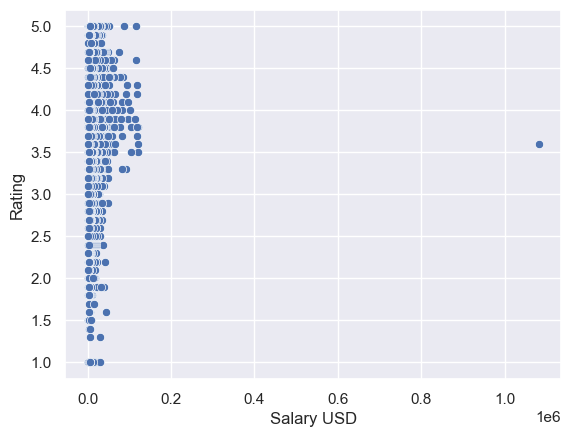

In [45]:
sns.scatterplot(x='Salary USD', y='Rating', data=sps)

In [46]:
rating_3 = sps[sps['Rating']>3.5]

In [47]:
salaryUSD_M = rating_3[rating_3['Salary USD']>1000000]

In [48]:
salaryUSD_M

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
18635,3.6,Thapar University,Software Development Engineer (SDE),90000000,1,New Delhi,Full Time,SDE,1081555


<Axes: xlabel='Salary USD', ylabel='Rating'>

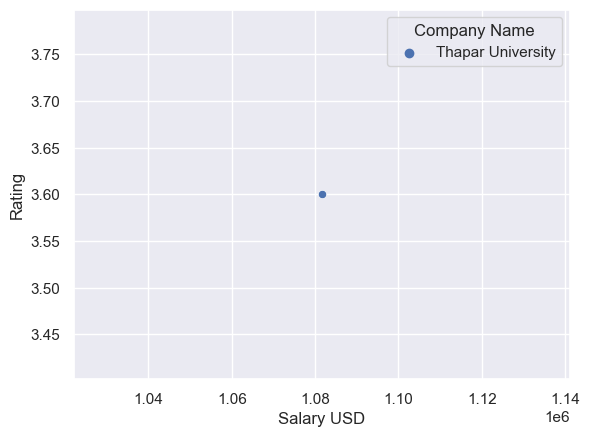

In [49]:
sns.scatterplot(x='Salary USD', y='Rating', hue='Company Name', data=salaryUSD_M)

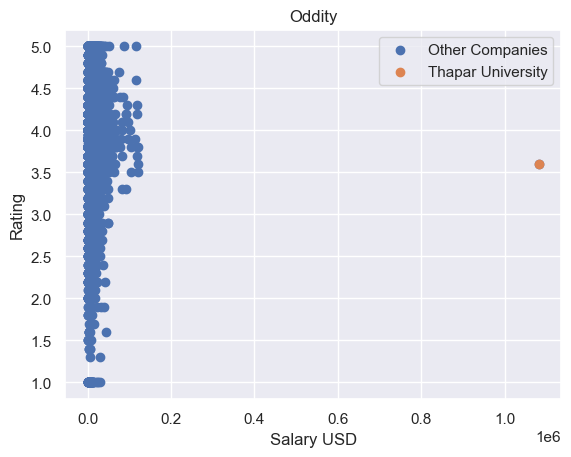

In [50]:
plt.scatter('Salary USD', 'Rating', data=sps, label='Other Companies')
plt.scatter('Salary USD', 'Rating', data=salaryUSD_M, label='Thapar University')
plt.xlabel('Salary USD')
plt.ylabel('Rating')
plt.title('Oddity')
plt.legend()
plt.show()

In [ ]:
# Thapar University is the Company that is causing the oddity